# Waste_Management_Model

In [1]:
# Import required libraries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import  MinMaxScaler ,OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split , cross_val_score
from sklearn.pipeline import Pipeline,make_pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV
from sklearn import set_config
import pickle

In [2]:
# Read the CSV file into a DataFrame
df = pd.read_csv("Processed_DatasetsAmount-of Waste-Generated-By-State 32121-0003.csv")

In [3]:
df.head()

,Year,States,Types of Waste,Total Household Waste Generated (Tons),Household Waste Generated per Inhabitant (kg)
0,2004,Baden-Württemberg,Residual household and bulky wastes,1605.6,150.0
1,2004,Baden-Württemberg,Separately collected organic wastes,1220.5,114.0
2,2004,Baden-Württemberg,Separately collected recyclables,1645.3,154.0
3,2004,Baden-Württemberg,Other wastes,9.4,1.0
4,2004,Bayern,Separately collected organic wastes,1677.3,135.0


In [4]:
# Check Number of Rows & Columns present in the DataFrame df. 
df.shape

(1046, 5)

## Data Preprocessing

In [5]:
df['Types of Waste'].unique()

array(['Residual household and bulky wastes',
       'Separately collected organic wastes',
       'Separately collected recyclables', 'Other wastes'], dtype=object)

In [6]:
# Check null values present in the DataFrame df.
df.isnull().sum()

Year                                             0
States                                           0
Types of Waste                                   0
Total Household Waste Generated (Tons)           0
Household Waste Generated per Inhabitant (kg)    0
dtype: int64

In [7]:
# Check for duplicate values.
df.duplicated().sum()

0

In [8]:
# Check basic statistics of numeric columns.
df.describe()

,Year,Total Household Waste Generated (Tons),Household Waste Generated per Inhabitant (kg)
count,1046.000000,1046.000000,1046.000000
mean,2012.451243,405.893881,110.816904
std,5.181030,462.755575,80.167121
min,2004.000000,0.100000,1.000000
25%,2008.000000,29.400000,21.000000
50%,2012.000000,230.300000,125.000000
75%,2017.000000,613.750000,163.000000
max,2021.000000,1799.100000,349.000000


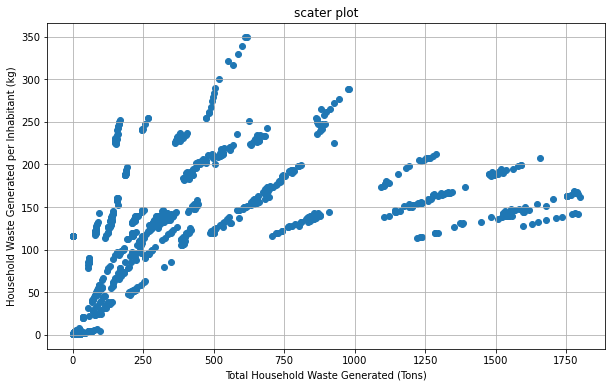

In [9]:
# Visualize the scater plot
plt.figure(figsize=(10, 6))
plt.scatter(x= df['Total Household Waste Generated (Tons)'],y=df['Household Waste Generated per Inhabitant (kg)'] )
plt.ylabel('Household Waste Generated per Inhabitant (kg)')
plt.xlabel('Total Household Waste Generated (Tons)')
plt.title('scater plot')
plt.grid(True)
plt.show()

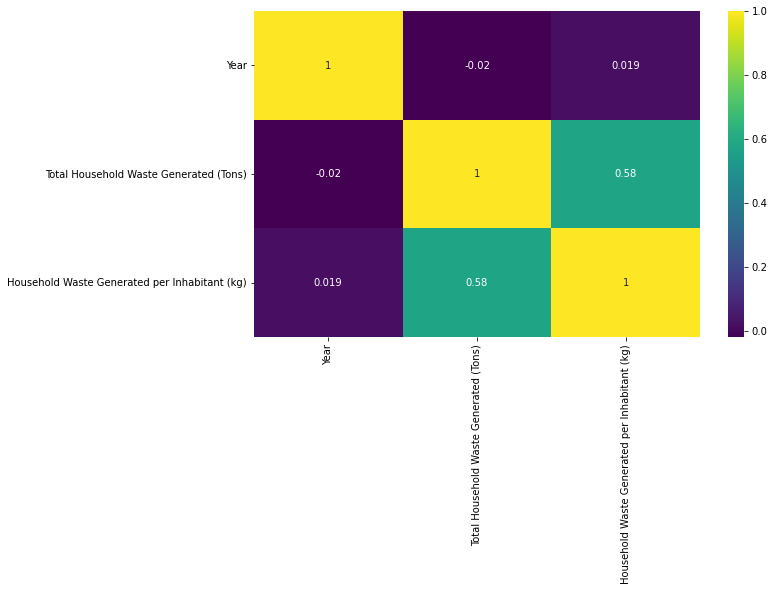

In [10]:
# Create a heatmap.
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap ='viridis')
plt.show()

**No such strong co-relation found**

In [11]:
# Define dependant & independant variables.
X = df[['Year','States','Types of Waste']] # Independant variables
y = df[['Total Household Waste Generated (Tons)','Household Waste Generated per Inhabitant (kg)']] # dependant variables

In [12]:
# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
X_train

,Year,States,Types of Waste
256,2008,Hessen,Residual household and bulky wastes
351,2009,Thüringen,Other wastes
60,2005,Baden-Württemberg,Separately collected recyclables
344,2009,Schleswig-Holstein,Residual household and bulky wastes
381,2010,Mecklenburg-Vorpommern,Other wastes
...,...,...,...
330,2009,Rheinland-Pfalz,Separately collected recyclables
466,2011,Thüringen,Residual household and bulky wastes
121,2006,Bayern,Other wastes
1044,2021,Thüringen,Separately collected recyclables


In [14]:
numeric_features = ['Year'] 
categorical_features = ['States','Types of Waste']

In [15]:
numeric_transformer = Pipeline(steps=[('scaler', MinMaxScaler(feature_range=(-1, 1)))])

In [16]:
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(sparse=False, handle_unknown='ignore'))])

In [17]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

In [18]:
# Models
reg_model = LinearRegression()
rf_model  = RandomForestRegressor()

## Create Pipeline

In [19]:
set_config(display='diagram')

In [20]:
# Create Pipeline for Linear Regression
reg_model = Pipeline(steps=[
    ('precprocessor', preprocessor),
   # ('feature_selection',feature_selection),
    ('Linear Regression', reg_model),
])

In [21]:
# Create Pipeline for Random Forest
rf_model = Pipeline(steps=[
    ('precprocessor', preprocessor),
   # ('feature_selection',feature_selection),
    ('Random Forest Regressor', rf_model)
])

## Train the Model

In [22]:
# Train Linear Regression Model
reg_model.fit(X_train,y_train)

Pipeline(steps=[('precprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   MinMaxScaler(feature_range=(-1,
                                                                                               1)))]),
                                                  ['Year']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  ['States',
                                                   'Types of Waste'])])),
                ('Linear Regression', LinearRegression())])

In [23]:
# Train Random Forest Model
rf_model.fit(X_train, y_train)

Pipeline(steps=[('precprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   MinMaxScaler(feature_range=(-1,
                                                                                               1)))]),
                                                  ['Year']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  ['States',
                                                   'Types of Waste'])])),
                ('Random Forest Regressor', RandomForestRegressor())])

## Prediction

In [24]:
y_pred_reg = reg_model.predict(X_test)
y_pred_rf  = rf_model.predict(X_test)

In [25]:
# Prediction for Regression Model
y_pred_reg

array([[ 8.17009458e+01,  1.23204791e+02],
       [-7.70495469e+01, -1.47906493e+01],
       [ 6.62646227e+02,  1.84000930e+02],
       [ 2.96614893e+02,  1.66425956e+01],
       [-2.35267921e+02,  1.78937237e+01],
       [ 1.38788045e+02,  1.13924993e+02],
       [ 3.54897282e+02,  1.21710175e+02],
       [ 2.40240958e+02,  8.33378603e+01],
       [ 5.60118916e+02,  2.08549228e+02],
       [-2.35755410e+02,  1.44701002e+01],
       [ 3.37974809e+02,  1.26381232e+02],
       [ 3.66530488e+02,  9.95969265e+01],
       [ 4.71345996e+02,  1.34832416e+02],
       [ 1.18138057e+03,  8.45778095e+01],
       [ 1.89169091e+02,  8.77993228e+01],
       [ 5.43701065e+02,  1.93822363e+02],
       [ 5.27083272e+02,  2.00633184e+02],
       [ 6.60332587e+02,  2.08228462e+02],
       [ 2.96919573e+02,  1.87823603e+01],
       [ 9.73008926e+01,  3.37664562e+01],
       [ 8.36752922e+02,  2.30846224e+02],
       [ 1.11810893e+03,  1.44145795e+02],
       [ 9.73618287e+01,  3.41944092e+01],
       [ 5.

In [26]:
# Prediction for Ramdom Forest  Model
y_pred_rf

array([[5.91300000e+01, 8.50500000e+01],
       [4.04100000e+00, 1.27000000e+00],
       [6.08627000e+02, 1.49610000e+02],
       [3.06300000e+00, 7.19999465e+01],
       [4.57500000e+00, 2.18000000e+00],
       [1.28521000e+02, 1.29860000e+02],
       [3.41418000e+02, 1.37050000e+02],
       [1.53281000e+02, 6.71300000e+01],
       [4.71925000e+02, 2.05850000e+02],
       [2.53400000e+00, 1.14000000e+00],
       [2.92979000e+02, 1.29730000e+02],
       [2.76061000e+02, 9.73800000e+01],
       [3.89826000e+02, 1.10720000e+02],
       [1.30613600e+03, 1.21800000e+02],
       [8.07370000e+01, 4.76900000e+01],
       [5.35180000e+02, 2.14500000e+02],
       [4.00017000e+02, 1.83780000e+02],
       [8.80019000e+02, 2.43000000e+02],
       [3.20000000e+00, 1.00000000e+00],
       [2.22570000e+01, 5.85000000e+00],
       [7.26094000e+02, 1.77970000e+02],
       [1.21229800e+03, 1.51590000e+02],
       [2.14570000e+01, 5.27000000e+00],
       [5.48233000e+02, 2.17740000e+02],
       [6.220000

In [27]:
# Calculate MSE for Linear Regression and Random Forest
mse_reg = mean_squared_error(y_test, y_pred_reg)
mse_rf  = mean_squared_error(y_test, y_pred_rf)
print('Mean Squared Error for Regression Model : ', mse_reg)
print('Mean Squared Error for Random Forest Model : ', mse_rf)

Mean Squared Error for Regression Model :  25512.570471422827
Mean Squared Error for Random Forest Model :  301.9306618526487


**Mean Squared Error for 'Random Forest Model' is very low, Means it will perform better.**

In [28]:
# Model Score 
reg_model_score = reg_model.score(X_test,y_test)
rf_model_score = rf_model.score(X_test,y_test)
print('Regression Model Score : ', round(reg_model_score,3))
print('Random Forest Model Score : ', round(rf_model_score,3))

Regression Model Score :  0.794
Random Forest Model Score :  0.985


**A higher model score indicates better predictive performance, so the Random Forest Model is considered as better fit.**

## Cross-Validation

In [29]:
# Calculate cross-validation scores
cross_val_scores = cross_val_score(rf_model, X_train, y_train, cv=5, scoring='r2')

# Print the cross-validation scores
print("Cross-Validation Scores for Random Forest Model:")
for fold, score in enumerate(cross_val_scores, start=1):
    print(f"Fold {fold}: R-squared Score = {score:.3f}")

# Calculate and print the mean score
mean_score = cross_val_scores.mean()
print(f"Mean Cross-Validation Score: {mean_score:.2f}")

Cross-Validation Scores for Random Forest Model:
Fold 1: R-squared Score = 0.984
Fold 2: R-squared Score = 0.988
Fold 3: R-squared Score = 0.983
Fold 4: R-squared Score = 0.996
Fold 5: R-squared Score = 0.994
Mean Cross-Validation Score: 0.99


## Hyperparameter Tuning

In [30]:
# Define the hyperparameters and their possible values to search
param_grid = {
    'Random Forest Regressor__n_estimators': [100, 200, 300],
    'Random Forest Regressor__max_depth': [None, 10, 20, 30],
    'Random Forest Regressor__min_samples_split': [2, 5, 10],
    'Random Forest Regressor__min_samples_leaf': [1, 2, 4]
}

# Create the GridSearchCV object.
grid_search = GridSearchCV(rf_model, param_grid, cv=5, scoring='neg_mean_squared_error')

In [31]:
# Fit the grid search on the training dataset.
final_model = grid_search.fit(X_train, y_train)
final_model

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('precprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('scaler',
                                                                                          MinMaxScaler(feature_range=(-1,
                                                                                                                      1)))]),
                                                                         ['Year']),
                                                                        ('cat',
                                                                         Pipeline(steps=[('onehot',
                                                                                          OneHotEncoder(handle_unknown='ignore',
                                                                                                        sparse=False))]),
                                                                         ['States',
                                                                          'Types '
                                                                          'of '
                                                                          'Waste'])])),
                                       ('Random Forest Regressor',
                                        RandomForestRegressor())]),
             param_grid={'Random Forest Regressor__max_depth': [None, 10, 20,
                                                                30],
                         'Random Forest Regressor__min_samples_leaf': [1, 2, 4],
                         'Random Forest Regressor__min_samples_split': [2, 5,
                                                                        10],
                         'Random Forest Regressor__n_estimators': [100, 200,
                                                                   300]},
             scoring='neg_mean_squared_error')

In [32]:
# Print the best hyperparameters and the corresponding R-squared score
print("Best Hyperparameters:", final_model.best_params_)
print("Best Score (R-squared):", final_model.best_score_)

Best Hyperparameters: {'Random Forest Regressor__max_depth': 30, 'Random Forest Regressor__min_samples_leaf': 1, 'Random Forest Regressor__min_samples_split': 2, 'Random Forest Regressor__n_estimators': 300}
Best Score (R-squared): -234.34375749833507


In [33]:
# Prediction after Fine Tuning
y_pred_fine_tune = final_model.predict(X_test)

# Export the Pipeline

In [52]:
pickle.dump(final_model,open('rf_model.pkl','wb'))

## Predict the output for ' Residual household and bulky wastes ' considering year 2022

In [53]:
states = df['States'].unique()

In [54]:
df_input = pd.DataFrame(states,columns=['States'])

In [55]:
df_input['Year'] = 2022
df_input['Types of Waste'] = 'Residual household and bulky wastes'

In [56]:
df_input

,States,Year,Types of Waste
0,Baden-Württemberg,2022,Residual household and bulky wastes
1,Bayern,2022,Residual household and bulky wastes
2,Berlin,2022,Residual household and bulky wastes
3,Brandenburg,2022,Residual household and bulky wastes
4,Bremen,2022,Residual household and bulky wastes
5,Hamburg,2022,Residual household and bulky wastes
6,Hessen,2022,Residual household and bulky wastes
7,Mecklenburg-Vorpommern,2022,Residual household and bulky wastes
8,Niedersachsen,2022,Residual household and bulky wastes
9,Nordrhein-Westfalen,2022,Residual household and bulky wastes


In [57]:
output = final_model.predict(df_input)

In [58]:
df_output = pd.DataFrame(output, columns=['Total Household Waste Generated (Tons)','Household Waste Generated per Inhabitant (kg)'])

In [59]:
df_final_2022 = pd.concat([df_input,df_output],axis=1)
df_final_2022.index += 1
df_final_2022

,States,Year,Types of Waste,Total Household Waste Generated (Tons),Household Waste Generated per Inhabitant (kg)
1,Baden-Württemberg,2022,Residual household and bulky wastes,1603.702000,144.343333
2,Bayern,2022,Residual household and bulky wastes,1706.945000,145.686667
3,Berlin,2022,Residual household and bulky wastes,879.415667,239.713333
4,Brandenburg,2022,Residual household and bulky wastes,553.163000,218.243333
5,Bremen,2022,Residual household and bulky wastes,158.640333,234.416667
6,Hamburg,2022,Residual household and bulky wastes,475.741333,256.560000
7,Hessen,2022,Residual household and bulky wastes,1102.499000,175.160000
8,Mecklenburg-Vorpommern,2022,Residual household and bulky wastes,372.433000,231.310000
9,Niedersachsen,2022,Residual household and bulky wastes,1530.981000,190.860000
10,Nordrhein-Westfalen,2022,Residual household and bulky wastes,469.853333,210.730000


## Predict the output for ' Separately collected organic wastes ' considering year 2023

In [60]:
df_input_2 = df_input

In [61]:
df_input_2['Year'] = 2023
df_input_2['Types of Waste'] = 'Separately collected organic wastes'

In [62]:
df_input_2

,States,Year,Types of Waste
0,Baden-Württemberg,2023,Separately collected organic wastes
1,Bayern,2023,Separately collected organic wastes
2,Berlin,2023,Separately collected organic wastes
3,Brandenburg,2023,Separately collected organic wastes
4,Bremen,2023,Separately collected organic wastes
5,Hamburg,2023,Separately collected organic wastes
6,Hessen,2023,Separately collected organic wastes
7,Mecklenburg-Vorpommern,2023,Separately collected organic wastes
8,Niedersachsen,2023,Separately collected organic wastes
9,Nordrhein-Westfalen,2023,Separately collected organic wastes


In [63]:
output_2 = final_model.predict(df_input_2)

In [64]:
df_output_2 = pd.DataFrame(output_2, columns=['Total Household Waste Generated (Tons)','Household Waste Generated per Inhabitant (kg)'])

In [65]:
df_final_2023 = pd.concat([df_input_2,df_output_2],axis=1)
df_final_2023.index += 1
df_final_2023

,States,Year,Types of Waste,Total Household Waste Generated (Tons),Household Waste Generated per Inhabitant (kg)
1,Baden-Württemberg,2023,Separately collected organic wastes,1635.478333,147.166667
2,Bayern,2023,Separately collected organic wastes,1782.910333,141.826667
3,Berlin,2023,Separately collected organic wastes,132.156667,39.723333
4,Brandenburg,2023,Separately collected organic wastes,187.208333,76.713333
5,Bremen,2023,Separately collected organic wastes,64.306333,85.440000
6,Hamburg,2023,Separately collected organic wastes,105.216667,55.163333
7,Hessen,2023,Separately collected organic wastes,880.943667,139.796667
8,Mecklenburg-Vorpommern,2023,Separately collected organic wastes,146.174667,85.003333
9,Niedersachsen,2023,Separately collected organic wastes,1363.545667,169.776667
10,Nordrhein-Westfalen,2023,Separately collected organic wastes,140.513333,63.206667


## Conclusion:
- Model Performance: Two models were trained on the data – the Linear Regression Model and the Random Forest Regression Model. Their performance scores were as follows:

         Regression Model Score: 79 %
         Random Forest Model Score: 99 %
      
- Cross-Validation: The Random Forest Model underwent cross-validation, assessing its consistency across different data subsets. Average Cross-Validation Score is 0.99. This underscores the model's robustness and its capacity to generalize effectively to new data.

- Fine Tuning: To enhance the Random Forest Model's performance, a grid search was conducted to fine-tune its hyperparameters. This optimization process, guided by negative mean squared error, aims to enhance the model's accuracy and predictive power.

The Random Forest Regression Model is a suitable choice for predicting the output, based on the provided features. It has demonstrated excellent performance, generalization capabilities and potential for further improvement through hyperparameter tuning.